# Programming Assignment 2
# Spencer McAvey

In [1711]:
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
train = pd.read_csv('C:\\Users\Spencer\\Desktop\\Summer 2022\\Data Mining\\Homework\\Programming Assignment 2\\train.csv',
                   na_values=['nan'])
test = pd.read_csv('C:\\Users\Spencer\\Desktop\\Summer 2022\\Data Mining\\Homework\\Programming Assignment 2\\test.csv',
                   na_values=['nan'])

### Data Sample

In [1712]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Info

In [1713]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1714]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1715]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Out of 891 entries, there are only 204 entries in the cabin attribute. About 77% of entries are missing a cabin value. Rather than leaving most of the cabin attribute empty, or trying to somehow take an average of string value, we will just drop that attribute. Same as the name attribute. While all of the columns have a name, they also already have a unique identifying attribute, PassengerID. Also, the ticket attribute appears to be a mix of characters and numbers, and would probably be covered by fare, pclass, and embarked, so we will drop that, too.

In [1716]:
train = train.drop(columns=['Name', 'Cabin', 'Ticket'], axis=1)
test = test.drop(columns=['Name', 'Cabin', 'Ticket'], axis=1)

In [1717]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


### There's also 2 missing embarked values, so we'll replace that with the value of the mode.

In [1718]:
val = train['Embarked'].mode().values[0]
train['Embarked'].fillna(value = val, inplace=True)
pd.unique(train['Embarked'])
# print(test['Embarked'].mode().values[0])
test['Embarked'] = test['Embarked'].replace(np.nan, test['Embarked'].mode().values[0])

### We will replace the Embarked values with unique discrete integers

In [1719]:
train['Embarked'] = train['Embarked'].map({'C' : 0, 'S': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'C' : 0, 'S': 1, 'Q': 2})

In [1720]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,2
1,893,3,female,47.0,1,0,7.0000,1
2,894,2,male,62.0,0,0,9.6875,2
3,895,3,male,27.0,0,0,8.6625,1
4,896,3,female,22.0,1,1,12.2875,1


### And we will replace the sex attribute with a boolean values

In [1721]:
train['Sex'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
test['Sex'] = test['Sex'].apply(lambda x: 0 if x == 'male' else 1)

### New Data Sample

In [1722]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


### Data Statistics

In [1723]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.897868
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.514624
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### We'll fill in the missing ages with the average age, rounding to 1 decimal point as that's how all of the others are.

In [1724]:
train['Age'] = train['Age'].replace(np.nan, round(train['Age'].mean(), 1))
test['Age'] = test['Age'].replace(np.nan, round(train['Age'].mean(), 1))

### The test set data has some missing fare values, so we'll fill those in with the average fare

In [1725]:
test['Fare'] = test['Fare'].replace(np.nan, test['Fare'].mean())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033206 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069811 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331334  0.083081  0.018443   
Age             0.033206 -0.069811 -0.331334  1.000000 -0.232624 -0.179194   
SibSp          -0.057527 -0.035322  0.083081 -0.232624  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179194  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091563  0.159651  0.216225   
Sex            -0.042939  0.543351 -0.131900 -0.084155  0.114631  0.245489   

                 Fare       Sex  
PassengerId  0.012658 -0.042939  
Survived     0.257307  0.543351  
Pclass      -0.549500 -0.131900  
Age          0.091563 -0.084155  
SibSp        0.159651  0.114631  
Parch        0.216225  0.245489  
Fare         1.000000  0.182333  
Sex          0.182333  1.

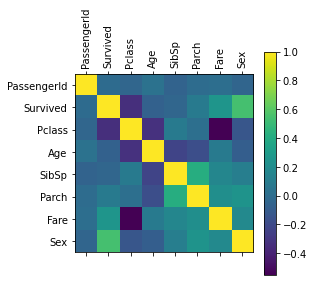

In [1726]:
cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
plt.matshow(train[cols].corr())
print(train[cols].corr())
ax = plt.gca()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(cols)
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticklabels(cols)
plt.xticks(rotation=90)
plt.colorbar()

### The largest correlation appears to be between sex and survived, followed by fare and survived.

### Brief overview of survivorship

(array([549., 342.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

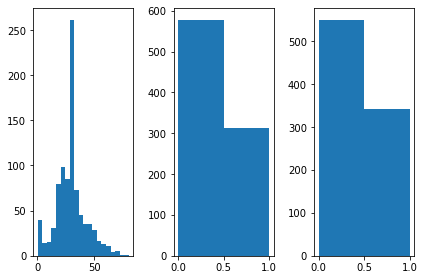

In [1727]:
fig, ax = plt.subplots(1, 3, tight_layout=True)
ax[0].hist(train['Age'], bins=20)
ax[1].hist(train['Sex'], bins=2)
ax[2].hist(train['Survived'], bins=2)

In [1728]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


In [1729]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699293,0.523008,0.381594,32.204208,0.897868
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.514624
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,29.700000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### Pull the survived attribute out of the data so we can compare our model agianst it

In [1730]:
survivedTrain = train.Survived
train = train.drop(columns=['Survived'], axis=1)
x = train.values
y = survivedTrain.values

### Create model

In [1731]:
clf = tree.DecisionTreeClassifier()
clf.fit(x, y)

DecisionTreeClassifier()

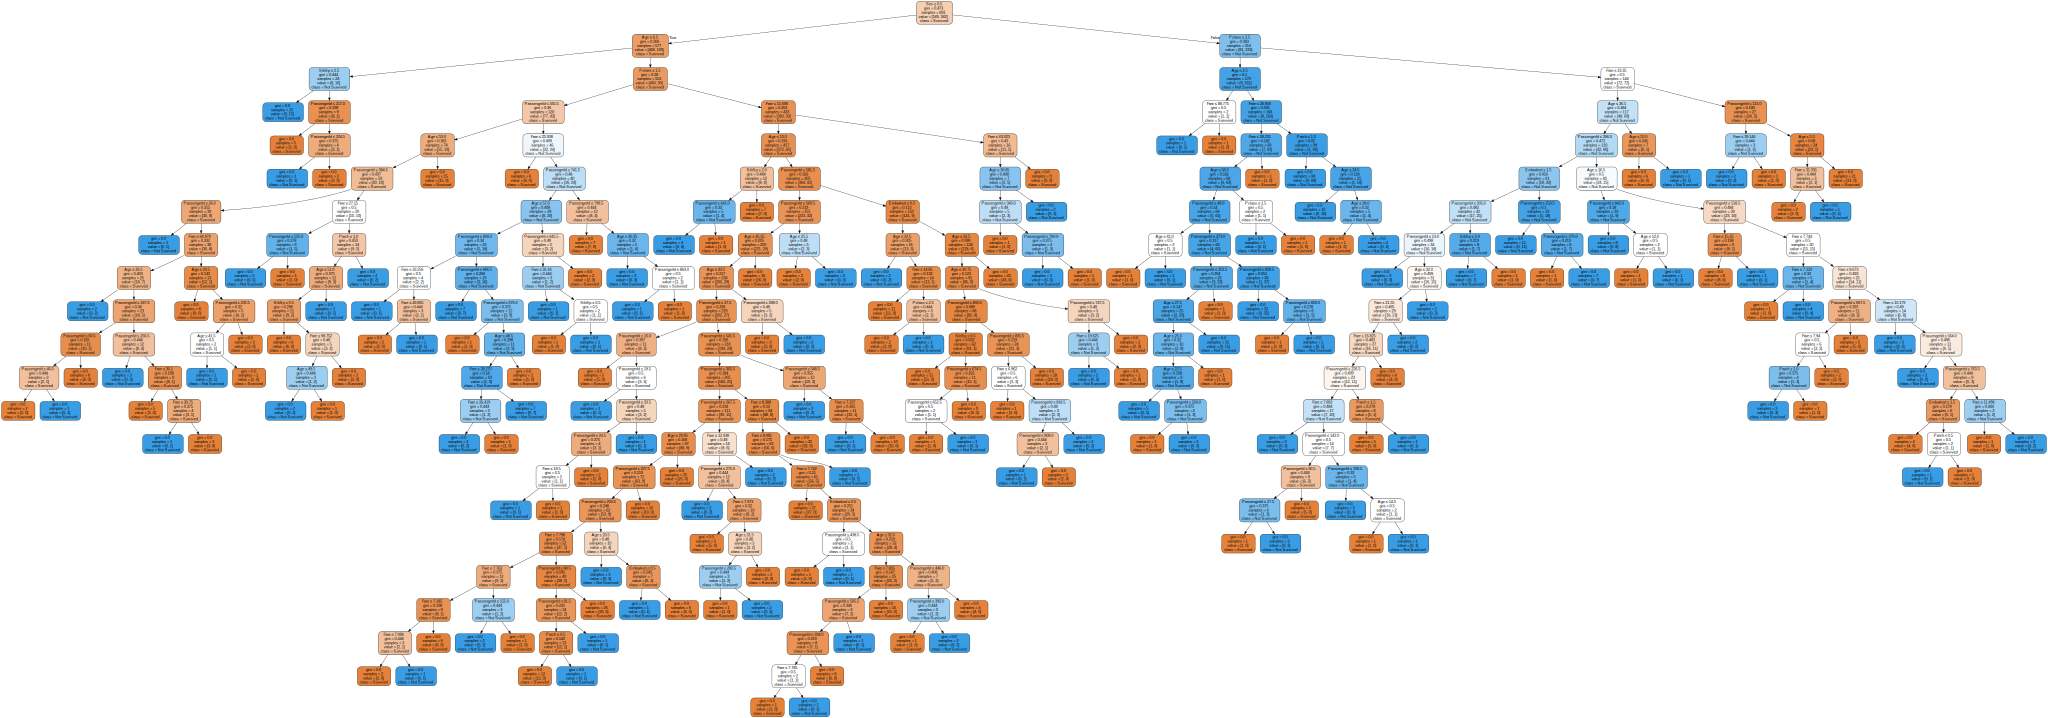

In [1732]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=train.columns.values,  
                         class_names=['Survived','Not Survived'], filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [1733]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.154785,0.447368,0.392344,35.627188,0.866029
std,120.810458,0.841838,0.481622,12.636659,0.896760,0.981429,55.840500,0.580452
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,0.000000,29.700000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [1734]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1


### Run our model on the test dataset

In [1735]:
testData = test.values
prediction = clf.predict(testData)
test['Survived'] = prediction

### Output our predictions and upload to Kaggle

In [1736]:
test[['PassengerId', 'Survived']].to_csv('C:\\Users\Spencer\\Desktop\\Summer 2022\\Data Mining\\Homework\\Programming Assignment 2\\testPred.csv',
                                        index=False)

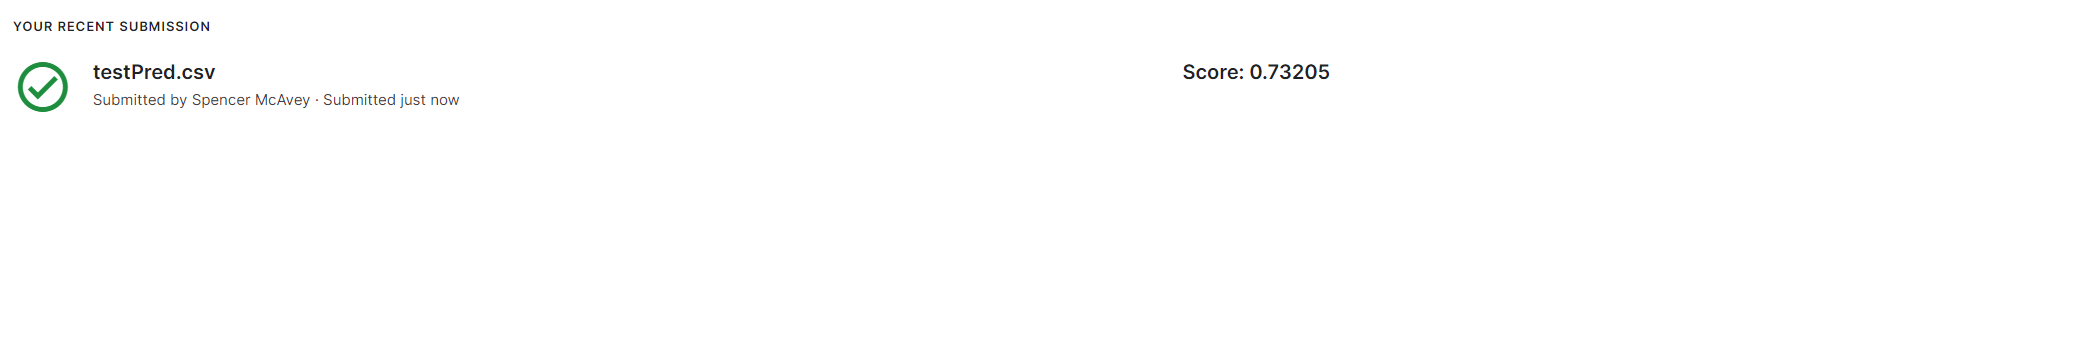

In [1737]:
from IPython.display import Image
Image('C:\\Users\Spencer\\Desktop\\Summer 2022\\Data Mining\\Homework\\Programming Assignment 2\\kaggle decision tree.png')

### Our decision tree had an accuracy of 73%.

### The loss of accurancy probably comes from dropping the name, cabin, and ticket attributes. Also having to speculate and filling in the missing values of age with the average age, and the embarked attribute with the mode value. To raise the accuracy if we had more time we could do more research into the Titanic layout and compare that to the cabin attribute to check the location of the cabin in terms of how close they are to the deck, and how close they are to the leaks in the ship hull.

### We will try a Bayesian Classifier next. We will use our existing data and train the model so we can compare the performance between models on the same data.

In [1738]:
clf = GaussianNB()
clf.fit(x, y)

GaussianNB()

### Drop the survived predictions on the test dataset that was populated by our decision tree model

In [1739]:
test = test.drop(columns=['Survived'], axis=1)
testData = test.values

### Make new predictions and output

In [1740]:
prediction = clf.predict(testData)
test['Survived'] = prediction
test[['PassengerId', 'Survived']].to_csv('C:\\Users\Spencer\\Desktop\\Summer 2022\\Data Mining\\Homework\\Programming Assignment 2\\testPredBayes.csv',
                                        index=False)

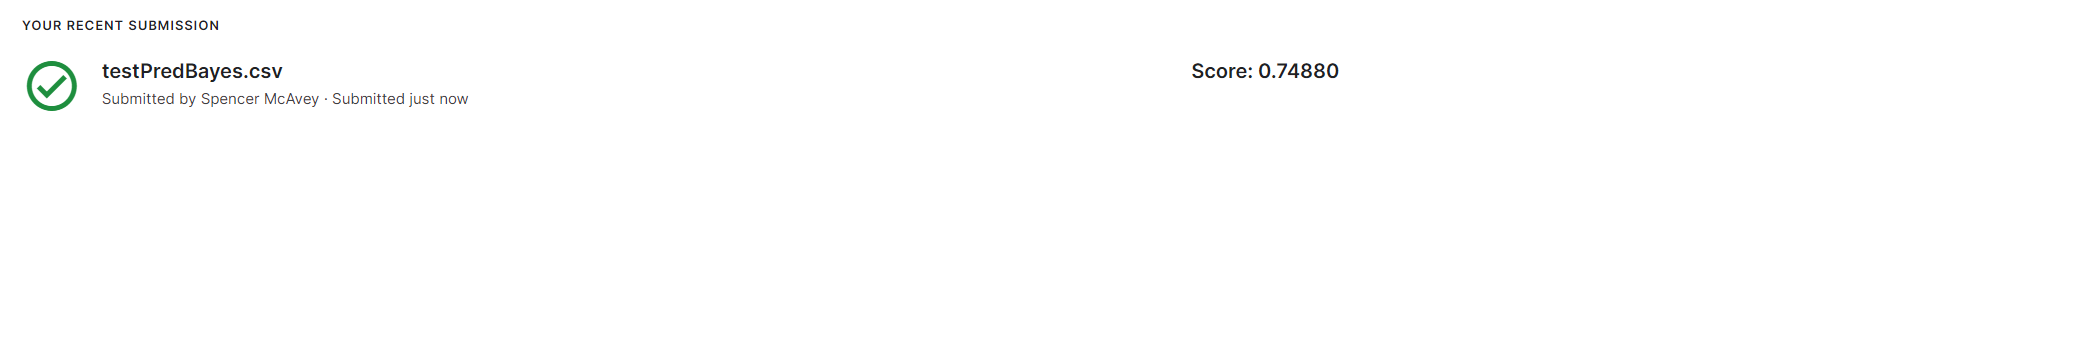

In [1741]:
Image('C:\\Users\Spencer\\Desktop\\Summer 2022\\Data Mining\\Homework\\Programming Assignment 2\\bayes.png')

### There is almost no difference in prediction accuracy which is probably to be expected since Gaussian Bayesian Classification is another popular classification model.

### We will try a support vector machine next to compare performance against the decision tree and the Bayesian Classifier

In [1742]:
clf = SVC(kernel='linear')
clf.fit(x, y)

### Drop the survived predictions on the test dataset that was populated by our Bayesian Classifier

In [1743]:
test = test.drop(columns=['Survived'], axis=1)
testData = test.values

### Make new predictions and output

In [1744]:
prediction = clf.predict(testData)
test['Survived'] = prediction
test[['PassengerId', 'Survived']].to_csv('C:\\Users\Spencer\\Desktop\\Summer 2022\\Data Mining\\Homework\\Programming Assignment 2\\svm.csv',
                                        index=False)

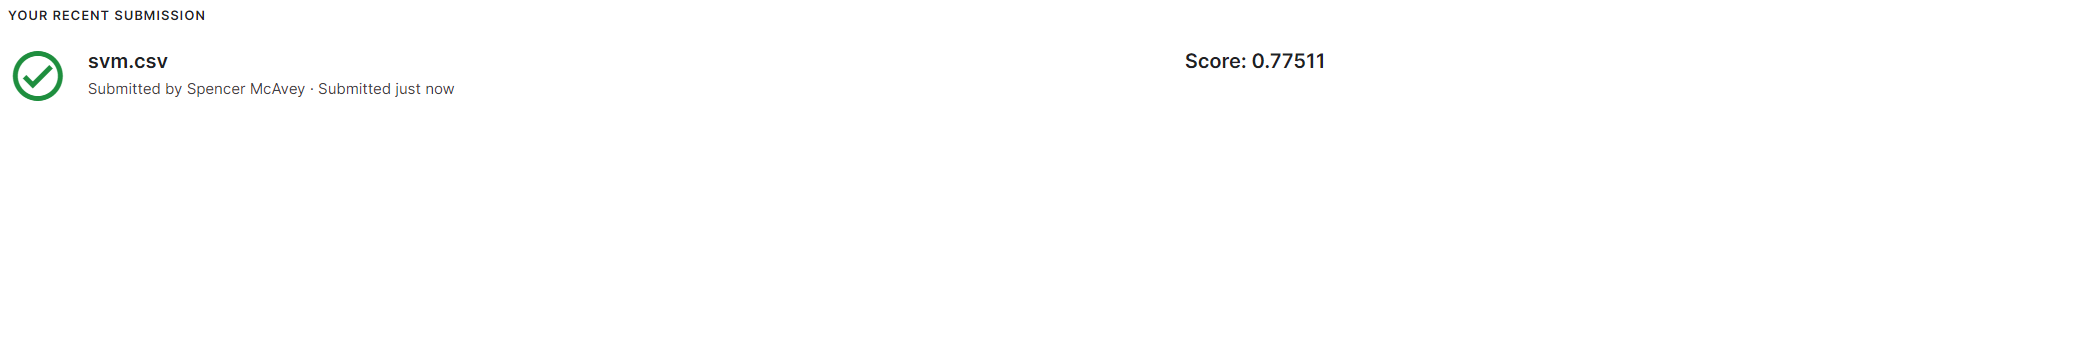

In [1745]:
Image('C:\\Users\Spencer\\Desktop\\Summer 2022\\Data Mining\\Homework\\Programming Assignment 2\\svm.png')

### Out of the three models, the support vector machine has the highest accuracy. Judging by the decision tree, perhaps our models aren't performing super well is due to overfitting as the tree is quite large and expansive. Additionally, I noticed that the PassengerId is a splitting attribute in the decision tree which shouldn't be, as the ID number is probably just a randomly assigned value. So, we will drop the PassengerId attribute and train a new decision tree and see what effect that has on the model's accuracy

In [1746]:
train = train.drop(columns=['PassengerId'], axis=1)
x = train.values
clf = tree.DecisionTreeClassifier()
clf.fit(x, y)
testIDs = list(test.PassengerId)
test = test.drop(columns=['Survived', 'PassengerId'], axis=1)
testData = test.values
prediction = list(clf.predict(testData))
data = list(zip(testIDs, prediction))
pred = pd.DataFrame(data, columns = ['PassengerId', 'Survived'])
pred[['PassengerId', 'Survived']].to_csv('C:\\Users\Spencer\\Desktop\\Summer 2022\\Data Mining\\Homework\\Programming Assignment 2\\tree2.csv',
                                        index=False)

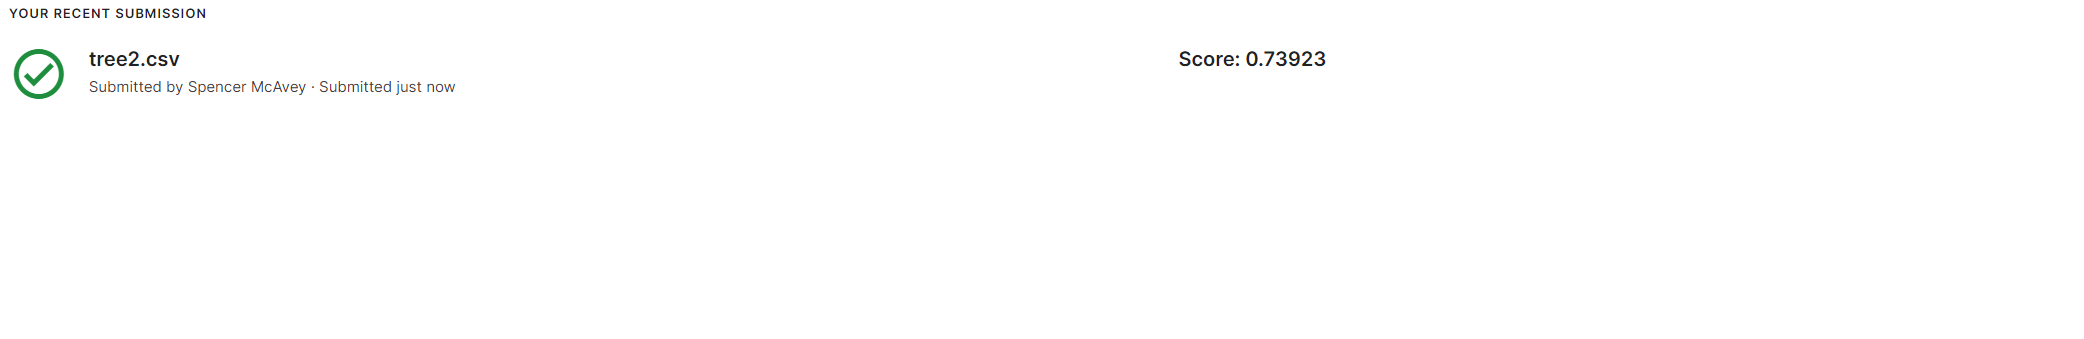

In [1748]:
Image('C:\\Users\Spencer\\Desktop\\Summer 2022\\Data Mining\\Homework\\Programming Assignment 2\\tree2.png')

### Removing the PassengerId attribute only increased the accuracy by 0.7%.